In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib as plt
import csv
import seaborn as sns
%matplotlib inline

In [2]:
movie_budgets_tn = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project folder/tn.movie_budgets.csv', header = 1)

In [3]:
movie_budgets_bom = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project folder/bom.movie_gross.csv', header = 1)
    

In [4]:
tmb_movies = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project folder/tmdb.movies.csv', header = 1)

In [5]:
rt_reviews = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project folder/rt.reviews.csv', header = 1)

In [6]:
db_conn = sqlite3.connect('im.db')

In [7]:
cur = db_conn.cursor()

In [8]:
cur.execute("""Select * FROM movie_basics;""")
cur.fetchall()

[('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama'),
 ('tt0066787',
  'One Day Before the Rainy Season',
  'Ashad Ka Ek Din',
  2019,
  114.0,
  'Biography,Drama'),
 ('tt0069049',
  'The Other Side of the Wind',
  'The Other Side of the Wind',
  2018,
  122.0,
  'Drama'),
 ('tt0069204',
  'Sabse Bada Sukh',
  'Sabse Bada Sukh',
  2018,
  None,
  'Comedy,Drama'),
 ('tt0100275',
  'The Wandering Soap Opera',
  'La Telenovela Errante',
  2017,
  80.0,
  'Comedy,Drama,Fantasy'),
 ('tt0111414', 'A Thin Life', 'A Thin Life', 2018, 75.0, 'Comedy'),
 ('tt0112502', 'Bigfoot', 'Bigfoot', 2017, None, 'Horror,Thriller'),
 ('tt0137204',
  'Joe Finds Grace',
  'Joe Finds Grace',
  2017,
  83.0,
  'Adventure,Animation,Comedy'),
 ('tt0139613', 'O Silêncio', 'O Silêncio', 2012, None, 'Documentary,History'),
 ('tt0144449',
  'Nema aviona za Zagreb',
  'Nema aviona za Zagreb',
  2012,
  82.0,
  'Biography'),
 ('tt0146592', 'Pál Adrienn', 'Pál Adrienn', 2010, 136.0, 'Drama'),
 ('tt

In [9]:
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000.00","$760,507,625.00","$2,776,345,279.00"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000.00","$241,063,875.00","$1,045,663,875.00"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000.00","$42,762,350.00","$149,762,350.00"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000.00","$459,005,868.00","$1,403,013,963.00"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000.00","$620,181,382.00","$1,316,721,747.00"


In [10]:
movie_budgets_tn['production_budget'] = movie_budgets_tn['production_budget']\
.str.replace('$',"").str.replace(",",'').astype(float)
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625.00","$2,776,345,279.00"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875.00","$1,045,663,875.00"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350.00","$149,762,350.00"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868.00","$1,403,013,963.00"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382.00","$1,316,721,747.00"


In [11]:
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625.00","$2,776,345,279.00"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875.00","$1,045,663,875.00"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350.00","$149,762,350.00"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868.00","$1,403,013,963.00"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382.00","$1,316,721,747.00"


In [12]:
movie_budgets_tn['domestic_gross']=movie_budgets_tn['domestic_gross']\
.str.replace('$','').str.replace(",",'').astype(float)

In [13]:
movie_budgets_tn['worldwide_gross']=movie_budgets_tn['worldwide_gross']\
.str.replace('$','').str.replace(",",'').astype(float)

In [14]:
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [15]:
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [16]:
movie_budgets_tn.sort_values('release_date')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5559,60,"Apr 1, 1975",Death Race 2000,300000.0,0.0,0.0
5520,21,"Apr 1, 1986",My Beautiful Laundrette,400000.0,0.0,0.0
2260,61,"Apr 1, 1988","Bright Lights, Big City",25000000.0,16118077.0,16118077.0
5769,70,"Apr 1, 1996",Bang,10000.0,527.0,527.0
1408,9,"Apr 1, 2005",Sin City,40000000.0,74103820.0,158527918.0
...,...,...,...,...,...,...
849,50,"Sep 9, 2016",Sully,60000000.0,125070033.0,238524556.0
3287,88,"Sep 9, 2016",Robinson Crusoe,13000000.0,8005586.0,42446455.0
3712,13,"Sep 9, 2016",Kicks,10000000.0,150191.0,150191.0
3129,30,"Sep 9, 2016",The Disappointments Room,15000000.0,2423467.0,3503761.0


In [17]:
movie_budgets_tn['profit']=(movie_budgets_tn['worldwide_gross']+\
movie_budgets_tn['domestic_gross'])-movie_budgets_tn['production_budget']

In [18]:
movie_budgets_tn.sort_values('profit', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.000000e+00,-9.000000e+07
479,80,"Dec 13, 2017",Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [19]:
movie_budgets_tn['roi']=movie_budgets_tn['profit']/movie_budgets_tn['production_budget']
movie_budgets_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-1.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.829770e+05,47.162833
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-2.324000e+03,-0.464800
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1.000000


In [20]:
movie_budgets_tn.sort_values('roi', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,89975000.0,3599.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,301651844.0,670.337431
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,388239099.0,647.065165
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,64320884.0,643.208840
5773,74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,4075848.0,582.264000
...,...,...,...,...,...,...,...,...
5111,12,"Jun 3, 2011",The Lion of Judah,1500000.0,0.0,0.0,-1500000.0,-1.000000
5110,11,"Mar 17, 2006",Fetching Cody,1500000.0,0.0,0.0,-1500000.0,-1.000000
5061,62,"Aug 5, 1955",The Kingâs Thief,1577000.0,0.0,0.0,-1577000.0,-1.000000
5037,38,"Apr 23, 2019",Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.0,-1750000.0,-1.000000


In [21]:
movie_budgets_tn.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,roi
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.017730e+08,6.783702
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2.108880e+08,54.922090
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-1.574753e+08,-1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-3.098222e+05,-0.202878
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2.499538e+07,1.659315
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.111648e+08,4.893170
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.111853e+09,3599.000000


In [22]:
pb_q1 = movie_budgets_tn['production_budget'].quantile(0.25)
pb_q3 = movie_budgets_tn['production_budget'].quantile(0.75)
pb_q3


40000000.0

In [23]:
movie_budgets_filtered_iqr = movie_budgets_tn.query('@pb_q1 <= production_budget <= @pb_q3')

In [24]:
movie_budgets_filtered_iqr.sort_values('roi')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
4399,100,"Oct 27, 2015",Running Forever,5000000.0,0.0,0.0,-5.000000e+06,-1.000000
1542,43,"Sep 13, 2019",The Goldfinch,40000000.0,0.0,0.0,-4.000000e+07,-1.000000
1541,42,"Dec 31, 2018",The Crow,40000000.0,0.0,0.0,-4.000000e+07,-1.000000
3741,42,"May 26, 2009",The Devil's Tomb,10000000.0,0.0,0.0,-1.000000e+07,-1.000000
3742,43,"Dec 31, 2009",Good Intentions,10000000.0,0.0,0.0,-1.000000e+07,-1.000000
...,...,...,...,...,...,...,...,...
4248,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,4.264086e+08,85.281723
4112,13,"Jun 16, 1978",Grease,6000000.0,181813770.0,387510179.0,5.633239e+08,93.887325
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,786598007.0,1.236596e+09,112.417819
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000.0,435110554.0,792965326.0,1.217576e+09,115.959608


In [25]:
movie_budgets_filtered_iqr.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,roi
count,3026.000000,3.026000e+03,3.026000e+03,3.026000e+03,3.026000e+03,3026.000000
mean,50.817911,1.890342e+07,3.026370e+07,5.396695e+07,6.532723e+07,4.020904
std,28.957082,1.039523e+07,4.049290e+07,7.682826e+07,1.123250e+08,8.110522
min,1.000000,5.000000e+06,0.000000e+00,0.000000e+00,-4.000000e+07,-1.000000
25%,26.000000,1.000000e+07,4.019142e+06,8.845900e+06,-1.242596e+06,-0.085363
50%,51.000000,1.700000e+07,1.725211e+07,2.810052e+07,2.836259e+07,1.736448
75%,76.000000,2.600000e+07,4.082051e+07,6.782200e+07,8.762205e+07,4.984722
max,100.000000,4.000000e+07,4.609980e+08,7.929653e+08,1.236596e+09,122.265648


/Users/jasonhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


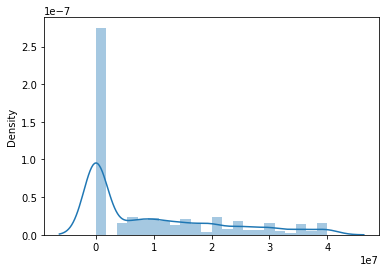

In [26]:
profits_vis = sns.distplot(movie_budgets_filtered_iqr[['roi','production_budget']])

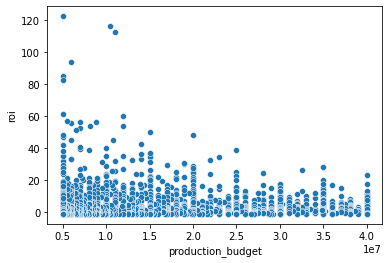

In [27]:
profits_vis2 = sns.scatterplot(data = movie_budgets_filtered_iqr, y="roi", x='production_budget')

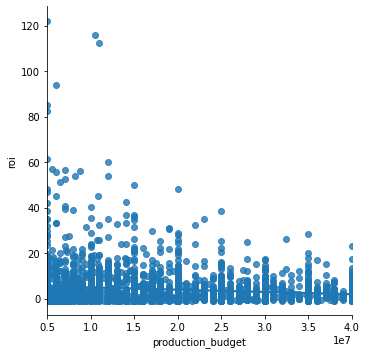

In [28]:
sns.lmplot(data =movie_budgets_filtered_iqr,y='roi',x = 'production_budget')

In [29]:
movie_budgets_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [30]:
movie_budgets_bom['foreign_gross'] = movie_budgets_bom['foreign_gross'].str.replace(',','').astype(float)
movie_budgets_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [31]:
movie_budgets_bom.replace(np.nan, 0, inplace = True)

In [32]:
movie_budgets_bom.sort_values('year')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
222,Flipped,WB,1800000.0,0.0,2010
221,Cairo Time,IFC,1600000.0,391000.0,2010
220,After.Life,Anch.,109000.0,1900000.0,2010
219,Golmaal 3,Eros,1100000.0,935000.0,2010
...,...,...,...,...,...
3177,Mary Queen of Scots,Focus,16500000.0,29900000.0,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000.0,2018
3175,Uncle Drew,LG/S,42500000.0,4200000.0,2018
3182,Show Dogs,Global Road,17900000.0,21300000.0,2018


In [33]:
movie_budgets_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [34]:
movie_budgets_bom['total_gross']=movie_budgets_bom['domestic_gross']+movie_budgets_bom['foreign_gross']

In [35]:
movie_budgets_bom.sort_values('title')

,title,studio,domestic_gross,foreign_gross,year,total_gross
2093,'71,RAtt.,1300000.0,355000.0,2015,1.655000e+06
1830,"1,000 Times Good Night",FM,53900.0,0.0,2014,5.390000e+04
2395,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016,1.102000e+08
1040,10 Years,Anch.,203000.0,0.0,2012,2.030000e+05
2283,1001 Grams,KL,11000.0,0.0,2015,1.100000e+04
...,...,...,...,...,...,...
2426,Zoolander 2,Par.,28800000.0,27900000.0,2016,5.670000e+07
2325,Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
148,[Rec] 2,Magn.,27800.0,18500000.0,2010,1.852780e+07
2865,mother!,Par.,17800000.0,26700000.0,2017,4.450000e+07


In [36]:
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105


In [37]:
movie_budgets_tn.sort_values('movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
5115,16,"Nov 20, 2015",#Horror,1500000.0,0.0,0.0,-1500000.0,-1.000000
3954,55,"Jul 17, 2009",(500) Days of Summer,7500000.0,32425665.0,34439060.0,59364725.0,7.915297
4253,54,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,72082999.0,108286422.0,175369421.0,35.073884
3447,48,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,14616.0,14616.0,-11970768.0,-0.997564
3262,63,"Mar 31, 1999",10 Things I Hate About You,13000000.0,38177966.0,60413950.0,85591916.0,6.583994
...,...,...,...,...,...,...,...,...
1958,59,"Sep 15, 2017",mother!,30000000.0,17800004.0,42531076.0,30331080.0,1.011036
697,98,"Aug 9, 2002",xXx,70000000.0,141930000.0,267200000.0,339130000.0,4.844714
514,15,"Jan 20, 2017",xXx: Return of Xander Cage,85000000.0,44898413.0,345033359.0,304931772.0,3.587433
4756,57,"Apr 15, 2008",Ã l\'intÃ©rieur,3000000.0,0.0,895932.0,-2104068.0,-0.701356


In [38]:
tmb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [39]:
tmb_movies.sort_values('vote_average', ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1


In [40]:
! ls

bom.movie_gross.csv   phase_1 project.ipynb tmdb.movies.csv
im.db                 rt.movie_info.csv     tn.movie_budgets.csv
im.sqlite             rt.reviews.csv


In [41]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")


In [42]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [43]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [44]:
rt_reviews.sort_values('rating', ascending=False)

,id,review,rating,fresh,critic,top_critic,publisher,date
47013,1765,"upposed to be a horror-comedy film, but it's n...",T,rotten,Jeff Vice,0,Deseret News (Salt Lake City),"January 1, 2000"
18601,760,The times they are a-changin': a frat comedy w...,R,fresh,Jaymes Durante,0,NaN,"May 18, 2016"
38411,1483,Often evoking the dark humour of a Beckett pla...,R,fresh,Isobel Yeap,0,NaN,"May 15, 2016"
16421,667,The humour thrives primarily off of the kookin...,R,fresh,Isobel Yeap,0,NaN,"May 13, 2016"
6497,251,What Carol captures more specifically than the...,R,fresh,Ian Barr,0,NaN,"March 2, 2016"
...,...,...,...,...,...,...,...,...
54409,2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
54417,2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [45]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [46]:
movie_budgets_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
 7   roi                5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [47]:
tmb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [48]:
movie_budgets_w_review= movie_budgets_tn.merge(tmb_movies, left_on = 'movie', right_on ='title')

In [49]:
movie_budgets_w_review

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,8.089832,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,5.849695e+08,1.949898,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,49,"Sep 1, 2015",Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,18.591680,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,Exeter,4.7,121
2381,51,"Apr 21, 2015",Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,-1.000000,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,Ten,5.4,5
2382,54,"Dec 31, 2014",Dry Spell,22000.0,0.0,0.000000e+00,-2.200000e+04,-1.000000,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,Dry Spell,6.0,1
2383,56,"Jan 4, 2013",All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,-1.000000,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,All Superheroes Must Die,3.9,19


In [50]:
movie_budgets_w_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               2385 non-null   int64  
 1   release_date_x     2385 non-null   object 
 2   movie              2385 non-null   object 
 3   production_budget  2385 non-null   float64
 4   domestic_gross     2385 non-null   float64
 5   worldwide_gross    2385 non-null   float64
 6   profit             2385 non-null   float64
 7   roi                2385 non-null   float64
 8   Unnamed: 0         2385 non-null   int64  
 9   genre_ids          2385 non-null   object 
 10  id_y               2385 non-null   int64  
 11  original_language  2385 non-null   object 
 12  original_title     2385 non-null   object 
 13  popularity         2385 non-null   float64
 14  release_date_y     2385 non-null   object 
 15  title              2385 non-null   object 
 16  vote_average       2385 

In [51]:
#movie_budgets_w_review.drop('Unnamed: 0', axis = 1).drop('release_date_x', axis = 1)\
#.drop('original_language', axis = 1).drop('original_title', axis = 1).drop('id', axis = 1)\
#.drop('title', axis= 1).drop('release_date_y')


In [52]:
budget_review_cleaned =movie_budgets_w_review[['movie', 'profit', 'roi', 'vote_average', 'popularity', 'production_budget']]

In [53]:
budget_review_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2385 non-null   object 
 1   profit             2385 non-null   float64
 2   roi                2385 non-null   float64
 3   vote_average       2385 non-null   float64
 4   popularity         2385 non-null   float64
 5   production_budget  2385 non-null   float64
dtypes: float64(5), object(1)
memory usage: 130.4+ KB


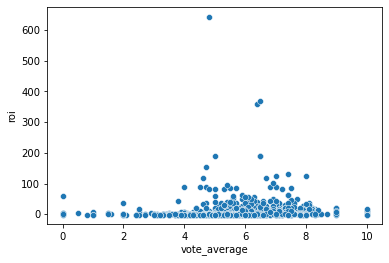

In [54]:
budget_review_vis = sns.scatterplot(data =budget_review_cleaned, y= 'roi', x = 'vote_average')

In [55]:
avg_rating = pd.read_sql("""SELECT * FROM movie_ratings;""", db_conn)

In [56]:
avg_rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [57]:
avg_rating_genre=pd.read_sql("""
SELECT r.averagerating, primary_title, genres
FROM movie_ratings r
JOIN movie_basics b
    ON r.movie_id = b.movie_id;""", db_conn)

In [58]:
avg_rating_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [59]:
budget_review_genre = budget_review_cleaned.merge(avg_rating_genre, left_on = 'movie', right_on = 'primary_title')

In [60]:
budget_review_genre = budget_review_genre.drop('primary_title', axis = 1)

In [61]:
budget_review_genre.head()

,movie,profit,roi,vote_average,popularity,production_budget,averagerating,genres
0,Avatar,3.111853e+09,7.322007,7.4,26.526,425000000.0,6.1,Horror
1,Pirates of the Caribbean: On Stranger Tides,8.761278e+08,2.133774,6.4,30.579,410600000.0,6.6,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,1.531420e+09,4.632244,7.3,44.383,330600000.0,7.3,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,2.426950e+09,8.089832,8.3,80.773,300000000.0,8.5,"Action,Adventure,Sci-Fi"
4,Justice League,5.849695e+08,1.949898,6.2,34.953,300000000.0,6.5,"Action,Adventure,Fantasy"


In [62]:
budget_review_genre.describe()

,profit,roi,vote_average,popularity,production_budget,averagerating
count,3.361000e+03,3361.000000,3361.000000,3361.000000,3.361000e+03,3361.000000
mean,1.199621e+08,6.609583,6.158643,9.022082,3.534103e+07,6.294347
std,2.486853e+08,22.019244,1.271010,8.167201,4.912214e+07,1.178406
min,-9.000000e+07,-1.000000,0.000000,0.600000,9.000000e+03,1.600000
25%,-1.000000e+06,-0.532522,5.500000,1.823000,5.000000e+06,5.700000
50%,3.426088e+07,1.562165,6.200000,8.166000,1.500000e+07,6.400000
75%,1.180557e+08,4.657625,7.000000,12.817000,4.000000e+07,7.100000
max,3.111853e+09,643.208840,10.000000,80.773000,4.250000e+08,9.300000


In [63]:
budget_review_genre

,movie,profit,roi,vote_average,popularity,production_budget,averagerating,genres
0,Avatar,3.111853e+09,7.322007,7.4,26.526,425000000.0,6.1,Horror
1,Pirates of the Caribbean: On Stranger Tides,8.761278e+08,2.133774,6.4,30.579,410600000.0,6.6,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,1.531420e+09,4.632244,7.3,44.383,330600000.0,7.3,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,2.426950e+09,8.089832,8.3,80.773,300000000.0,8.5,"Action,Adventure,Sci-Fi"
4,Justice League,5.849695e+08,1.949898,6.2,34.953,300000000.0,6.5,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
3356,Ten,-2.500000e+04,-1.000000,5.4,1.575,25000.0,5.5,Drama
3357,Ten,-2.500000e+04,-1.000000,5.4,1.575,25000.0,4.7,"Horror,Mystery,Thriller"
3358,Dry Spell,-2.200000e+04,-1.000000,6.0,0.600,22000.0,3.3,"Comedy,Romance"
3359,All Superheroes Must Die,-2.000000e+04,-1.000000,3.9,2.078,20000.0,4.0,"Sci-Fi,Thriller"


In [64]:
budget_review_genre_exploded = budget_review_genre.explode('genres')

In [65]:
budget_review_genre_exploded

,movie,profit,roi,vote_average,popularity,production_budget,averagerating,genres
0,Avatar,3.111853e+09,7.322007,7.4,26.526,425000000.0,6.1,Horror
1,Pirates of the Caribbean: On Stranger Tides,8.761278e+08,2.133774,6.4,30.579,410600000.0,6.6,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,1.531420e+09,4.632244,7.3,44.383,330600000.0,7.3,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,2.426950e+09,8.089832,8.3,80.773,300000000.0,8.5,"Action,Adventure,Sci-Fi"
4,Justice League,5.849695e+08,1.949898,6.2,34.953,300000000.0,6.5,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
3356,Ten,-2.500000e+04,-1.000000,5.4,1.575,25000.0,5.5,Drama
3357,Ten,-2.500000e+04,-1.000000,5.4,1.575,25000.0,4.7,"Horror,Mystery,Thriller"
3358,Dry Spell,-2.200000e+04,-1.000000,6.0,0.600,22000.0,3.3,"Comedy,Romance"
3359,All Superheroes Must Die,-2.000000e+04,-1.000000,3.9,2.078,20000.0,4.0,"Sci-Fi,Thriller"


In [66]:
budget_review_genre['genres'] = budget_review_genre['genres'].str.split()

In [67]:
budget_review_genre

,movie,profit,roi,vote_average,popularity,production_budget,averagerating,genres
0,Avatar,3.111853e+09,7.322007,7.4,26.526,425000000.0,6.1,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,8.761278e+08,2.133774,6.4,30.579,410600000.0,6.6,"[Action,Adventure,Fantasy]"
2,Avengers: Age of Ultron,1.531420e+09,4.632244,7.3,44.383,330600000.0,7.3,"[Action,Adventure,Sci-Fi]"
3,Avengers: Infinity War,2.426950e+09,8.089832,8.3,80.773,300000000.0,8.5,"[Action,Adventure,Sci-Fi]"
4,Justice League,5.849695e+08,1.949898,6.2,34.953,300000000.0,6.5,"[Action,Adventure,Fantasy]"
...,...,...,...,...,...,...,...,...
3356,Ten,-2.500000e+04,-1.000000,5.4,1.575,25000.0,5.5,[Drama]
3357,Ten,-2.500000e+04,-1.000000,5.4,1.575,25000.0,4.7,"[Horror,Mystery,Thriller]"
3358,Dry Spell,-2.200000e+04,-1.000000,6.0,0.600,22000.0,3.3,"[Comedy,Romance]"
3359,All Superheroes Must Die,-2.000000e+04,-1.000000,3.9,2.078,20000.0,4.0,"[Sci-Fi,Thriller]"


In [72]:
budget_review_genre.explode('genres")

SyntaxError: EOL while scanning string literal (<ipython-input-72-3cca98c2c6b9>, line 1)